In [71]:
import yfinance as yf
import pandas as pd

# Step 1: Define the company ticker
ticker = "AAPL"  # Example - Apple Inc.

# Step 2: Download historical data with adjusted prices
try:
    company_df = yf.download(ticker, start="2021-01-01", end="2025-06-30", auto_adjust=True)

    # Check if data was downloaded successfully
    if company_df.empty:
        raise ValueError(f"No data available for {ticker}")

except Exception as e:
    print(f"Error downloading data for {ticker}: {e}")
    raise


[*********************100%***********************]  1 of 1 completed


In [72]:
company_df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2021-01-04,126.239685,130.336789,123.654604,130.248998,143301900
2021-01-05,127.800468,128.512595,125.283672,125.732410,97664900
2021-01-06,123.498535,127.839523,123.283924,124.591100,155088000
2021-01-07,127.712730,128.405343,124.727696,125.215447,109578200
2021-01-08,128.815002,129.380795,127.039582,129.185683,105158200
...,...,...,...,...,...
2025-06-23,201.500000,202.300003,198.960007,201.630005,55814300
2025-06-24,200.300003,203.440002,200.199997,202.589996,54064000


In [56]:
import yfinance as yf
import pandas as pd

# Step 1: Define the company ticker
ticker = "AAPL"  # Example - Apple Inc.

# Step 2: Download historical data with adjusted prices
try:
    company_df = yf.download(ticker, start="2021-01-01", end="2025-06-30", auto_adjust=True)

    # Check if data was downloaded successfully
    if company_df.empty:
        raise ValueError(f"No data available for {ticker}")

except Exception as e:
    print(f"Error downloading data for {ticker}: {e}")
    raise

# Step 3: Reset index to make Date a column
company_df.reset_index(inplace=True)

# Step 4: Rename Close to Adj Close (since auto_adjust=True drops original 'Adj Close')
company_df.rename(columns={'Close': 'Adj Close'}, inplace=True)

# Step 5: Define required columns
required_columns = ['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume']
missing_cols = [col for col in required_columns if col not in company_df.columns]

if missing_cols:
    raise ValueError(f"Missing required columns: {missing_cols}")

# Step 6: Keep only the required columns
company_df = company_df[required_columns]

# Step 7: Set datetime index and ensure timezone-aware
company_df.set_index('Date', inplace=True)
company_df.index = pd.to_datetime(company_df.index, utc=True)

# Step 8: Reindex to daily frequency and forward fill missing values
full_range = pd.date_range(start=company_df.index.min(), end=company_df.index.max(), freq='D')
company_df = company_df.reindex(full_range)

# Forward fill OHLC and Adj Close
ohlc_cols = ['Open', 'High', 'Low', 'Adj Close']
company_df[ohlc_cols] = company_df[ohlc_cols].ffill()

# Fill missing Volume with 0 (for non-trading days)
company_df['Volume'] = company_df['Volume'].fillna(0)

# Step 9: Add returns and other metrics
company_df['Daily_Return'] = company_df['Adj Close'].pct_change()
company_df['Cumulative_Return'] = (1 + company_df['Daily_Return']).cumprod() - 1

# Step 10: Add moving averages
company_df['MA_50'] = company_df['Adj Close'].rolling(window=50).mean()
company_df['MA_200'] = company_df['Adj Close'].rolling(window=200).mean()

# Step 11: Clean up any remaining NA values (from beginning)
company_df.dropna(inplace=True)

# Step 12: Final Output
print(f"\nProcessed data for {ticker}:")
print(company_df.head())
print(company_df.tail())


[*********************100%***********************]  1 of 1 completed


Processed data for AAPL:
Price                            Open        High         Low   Adj Close  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
2021-07-22 00:00:00+00:00  142.819688  145.031362  142.692462  143.661301   
2021-07-23 00:00:00+00:00  144.395206  145.540189  143.778672  145.383606   
2021-07-24 00:00:00+00:00  144.395206  145.540189  143.778672  145.383606   
2021-07-25 00:00:00+00:00  144.395206  145.540189  143.778672  145.383606   
2021-07-26 00:00:00+00:00  145.099821  146.626464  144.542001  145.804428   

Price                          Volume Daily_Return Cumulative_Return  \
Ticker                           AAPL                                  
2021-07-22 00:00:00+00:00  77338200.0     0.009629          0.138004   
2021-07-23 00:00:00+00:00  71447400.0     0.011989          0.151647   
2021-07-24 00:00:00+00:00         0.0     0.000000          0.151647   
2021-07-25 00:00:00+00:00         0.0     0.000000          0.151647   
20

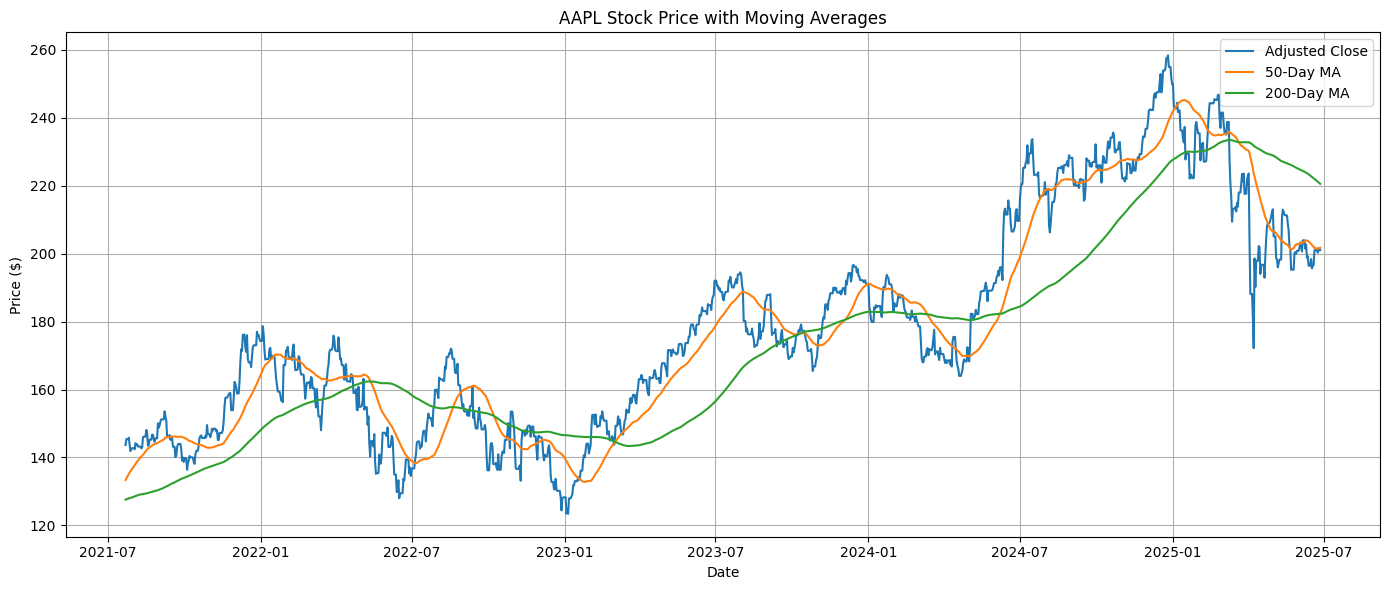

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(company_df.index, company_df['Adj Close'], label='Adjusted Close')
plt.plot(company_df.index, company_df['MA_50'], label='50-Day MA')
plt.plot(company_df.index, company_df['MA_200'], label='200-Day MA')
plt.title(f"{ticker} Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


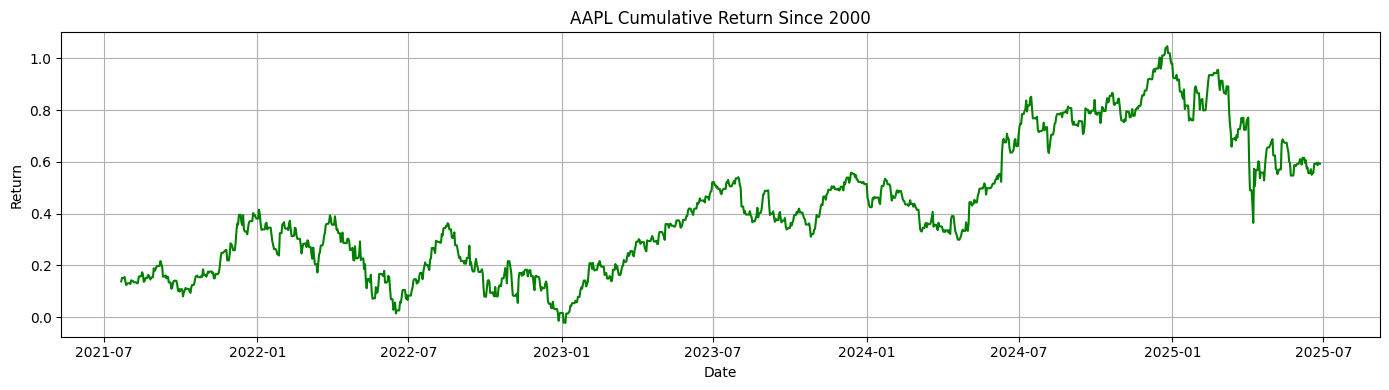

In [58]:
plt.figure(figsize=(14, 4))
plt.plot(company_df.index, company_df['Cumulative_Return'], label='Cumulative Return', color='green')
plt.title(f"{ticker} Cumulative Return Since 2000")
plt.xlabel("Date")
plt.ylabel("Return")
plt.grid(True)
plt.tight_layout()
plt.show()


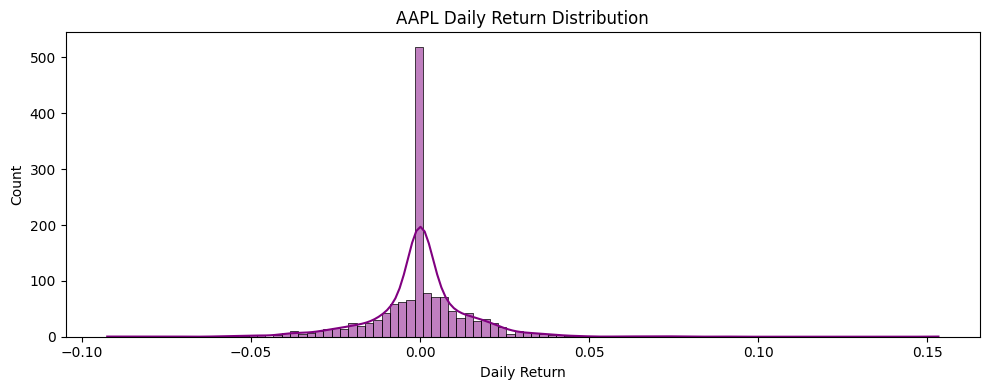

In [59]:
import seaborn as sns

plt.figure(figsize=(10, 4))
sns.histplot(company_df['Daily_Return'], bins=100, kde=True, color='purple')
plt.title(f"{ticker} Daily Return Distribution")
plt.xlabel("Daily Return")
plt.tight_layout()
plt.show()


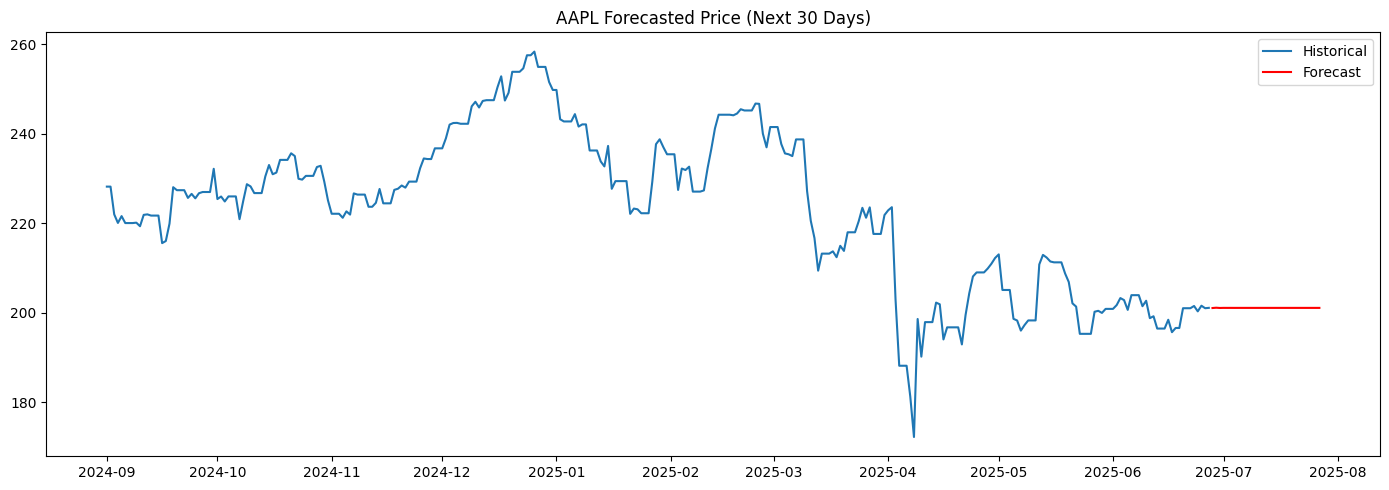

In [60]:
from statsmodels.tsa.arima.model import ARIMA

# Use only 'Adj Close' for forecasting
model = ARIMA(company_df['Adj Close'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.forecast(steps=30)

# Plot
plt.figure(figsize=(14, 5))
plt.plot(company_df.index[-300:], company_df['Adj Close'][-300:], label='Historical')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title(f"{ticker} Forecasted Price (Next 30 Days)")
plt.legend()
plt.tight_layout()
plt.show()


In [61]:
company_df.to_csv(f"{ticker}_processed_data.csv")


In [62]:
df=company_df.copy()

In [63]:
df.head()

Price,Open,High,Low,Adj Close,Volume,Daily_Return,Cumulative_Return,MA_50,MA_200
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
2021-07-22 00:00:00+00:00,142.819688,145.031362,142.692462,143.661301,77338200.0,0.009629,0.138004,133.354058,127.585929
2021-07-23 00:00:00+00:00,144.395206,145.540189,143.778672,145.383606,71447400.0,0.011989,0.151647,133.843759,127.681648
2021-07-24 00:00:00+00:00,144.395206,145.540189,143.778672,145.383606,0.0,0.000000,0.151647,134.287464,127.769564
2021-07-25 00:00:00+00:00,144.395206,145.540189,143.778672,145.383606,0.0,0.000000,0.151647,134.731169,127.878989
2021-07-26 00:00:00+00:00,145.099821,146.626464,144.542001,145.804428,72434100.0,0.002895,0.154981,135.183291,127.969448


In [64]:
data=df.copy()
data = data.reset_index()
# Show the first few rows
print(data.head())

Price                      index        Open        High         Low  \
Ticker                                  AAPL        AAPL        AAPL   
0      2021-07-22 00:00:00+00:00  142.819688  145.031362  142.692462   
1      2021-07-23 00:00:00+00:00  144.395206  145.540189  143.778672   
2      2021-07-24 00:00:00+00:00  144.395206  145.540189  143.778672   
3      2021-07-25 00:00:00+00:00  144.395206  145.540189  143.778672   
4      2021-07-26 00:00:00+00:00  145.099821  146.626464  144.542001   

Price    Adj Close      Volume Daily_Return Cumulative_Return       MA_50  \
Ticker        AAPL        AAPL                                              
0       143.661301  77338200.0     0.009629          0.138004  133.354058   
1       145.383606  71447400.0     0.011989          0.151647  133.843759   
2       145.383606         0.0     0.000000          0.151647  134.287464   
3       145.383606         0.0     0.000000          0.151647  134.731169   
4       145.804428  72434100.0   

In [65]:
data

Price,index,Open,High,Low,Adj Close,Volume,Daily_Return,Cumulative_Return,MA_50,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,,,
0,2021-07-22 00:00:00+00:00,142.819688,145.031362,142.692462,143.661301,77338200.0,0.009629,0.138004,133.354058,127.585929
1,2021-07-23 00:00:00+00:00,144.395206,145.540189,143.778672,145.383606,71447400.0,0.011989,0.151647,133.843759,127.681648
2,2021-07-24 00:00:00+00:00,144.395206,145.540189,143.778672,145.383606,0.0,0.000000,0.151647,134.287464,127.769564
3,2021-07-25 00:00:00+00:00,144.395206,145.540189,143.778672,145.383606,0.0,0.000000,0.151647,134.731169,127.878989
4,2021-07-26 00:00:00+00:00,145.099821,146.626464,144.542001,145.804428,72434100.0,0.002895,0.154981,135.183291,127.969448
...,...,...,...,...,...,...,...,...,...,...
1432,2025-06-23 00:00:00+00:00,201.630005,202.300003,198.960007,201.500000,55814300.0,0.002488,0.596170,201.456878,221.388590
1433,2025-06-24 00:00:00+00:00,202.589996,203.440002,200.199997,200.300003,54064000.0,-0.005955,0.586664,201.490287,221.178812
1434,2025-06-25 00:00:00+00:00,201.449997,203.669998,200.619995,201.559998,39525700.0,0.006291,0.596645,201.556487,220.975334


In [66]:
data.columns

MultiIndex([(            'index',     ''),
            (             'Open', 'AAPL'),
            (             'High', 'AAPL'),
            (              'Low', 'AAPL'),
            (        'Adj Close', 'AAPL'),
            (           'Volume', 'AAPL'),
            (     'Daily_Return',     ''),
            ('Cumulative_Return',     ''),
            (            'MA_50',     ''),
            (           'MA_200',     '')],
           names=['Price', 'Ticker'])

In [67]:
df = df.reset_index()

# Flatten the MultiIndex columns
df.columns = ['_'.join(filter(None, col)).strip() for col in df.columns.values]

In [68]:
df

,index,Open_AAPL,High_AAPL,Low_AAPL,Adj Close_AAPL,Volume_AAPL,Daily_Return,Cumulative_Return,MA_50,MA_200
0,2021-07-22 00:00:00+00:00,142.819688,145.031362,142.692462,143.661301,77338200.0,0.009629,0.138004,133.354058,127.585929
1,2021-07-23 00:00:00+00:00,144.395206,145.540189,143.778672,145.383606,71447400.0,0.011989,0.151647,133.843759,127.681648
2,2021-07-24 00:00:00+00:00,144.395206,145.540189,143.778672,145.383606,0.0,0.000000,0.151647,134.287464,127.769564
3,2021-07-25 00:00:00+00:00,144.395206,145.540189,143.778672,145.383606,0.0,0.000000,0.151647,134.731169,127.878989
4,2021-07-26 00:00:00+00:00,145.099821,146.626464,144.542001,145.804428,72434100.0,0.002895,0.154981,135.183291,127.969448
...,...,...,...,...,...,...,...,...,...,...
1432,2025-06-23 00:00:00+00:00,201.630005,202.300003,198.960007,201.500000,55814300.0,0.002488,0.596170,201.456878,221.388590
1433,2025-06-24 00:00:00+00:00,202.589996,203.440002,200.199997,200.300003,54064000.0,-0.005955,0.586664,201.490287,221.178812
1434,2025-06-25 00:00:00+00:00,201.449997,203.669998,200.619995,201.559998,39525700.0,0.006291,0.596645,201.556487,220.975334
1435,2025-06-26 00:00:00+00:00,201.429993,202.639999,199.460007,201.000000,50799100.0,-0.002778,0.592209,201.656628,220.769056


In [31]:
df.columns

Index(['index', 'Open_AAPL', 'High_AAPL', 'Low_AAPL', 'Adj Close_AAPL',
       'Volume_AAPL', 'Daily_Return', 'Cumulative_Return', 'MA_50', 'MA_200'],
      dtype='object')

In [30]:
df.dtypes

,0
index,"datetime64[ns, UTC]"
Open_AAPL,float64
High_AAPL,float64
Low_AAPL,float64
Adj Close_AAPL,float64
Volume_AAPL,float64
Daily_Return,float64
Cumulative_Return,float64
MA_50,float64
MA_200,float64


In [514]:
import yfinance as yf
import pandas as pd

# Step 1: Get the Ticker
ticker = yf.Ticker("AAPL")

# Step 2: Daily Stock Price (last 1 year)
daily_data = ticker.history(period="4y", interval="1d")

# Make index timezone-naive
daily_data.index = daily_data.index.tz_localize(None)

# Step 3: Get financial statements
financials = ticker.financials.T
balance_sheet = ticker.balance_sheet.T
cashflow = ticker.cashflow.T

# Convert their indexes to datetime and ensure timezone-naive
financials.index = pd.to_datetime(financials.index).tz_localize(None)
balance_sheet.index = pd.to_datetime(balance_sheet.index).tz_localize(None)
cashflow.index = pd.to_datetime(cashflow.index).tz_localize(None)

# Step 4: Merge and forward-fill financial data to daily
daily_data = daily_data.merge(financials, how='left', left_index=True, right_index=True)
daily_data = daily_data.merge(balance_sheet, how='left', left_index=True, right_index=True)
daily_data = daily_data.merge(cashflow, how='left', left_index=True, right_index=True)
daily_data = daily_data.ffill()

# Step 5: Add dividends (already daily, reindex safely)
dividends = ticker.dividends
daily_data['Dividend'] = dividends.reindex(daily_data.index, fill_value=0)

# Step 6: Optional - Clean column names
daily_data.columns = [str(col).replace(" ", "_").replace(".", "") for col in daily_data.columns]

# Step 7: Reset index
daily_data.reset_index(inplace=True)

# Step 8: Preview
print(daily_data.head())


        Date        Open        High         Low       Close     Volume  \
0 2021-07-15  146.049088  146.792833  143.945049  145.305328  106820300   
1 2021-07-16  145.285758  146.557950  142.760920  143.260010   93251400   
2 2021-07-19  140.676505  140.989670  138.640975  139.404297  121434600   
3 2021-07-20  140.392659  143.954831  139.903350  143.025131   96350000   
4 2021-07-21  142.418424  143.005601  141.537673  142.291199   74993500   

   Dividends  Stock_Splits  Tax_Effect_Of_Unusual_Items  Tax_Rate_For_Calcs  \
0        0.0           0.0                          NaN                 NaN   
1        0.0           0.0                          NaN                 NaN   
2        0.0           0.0                          NaN                 NaN   
3        0.0           0.0                          NaN                 NaN   
4        0.0           0.0                          NaN                 NaN   

   ...  Change_In_Receivables  Changes_In_Account_Receivables  \
0  ...   

In [515]:
daily_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock_Splits,Tax_Effect_Of_Unusual_Items,Tax_Rate_For_Calcs,...,Change_In_Receivables,Changes_In_Account_Receivables,Other_Non_Cash_Items,Stock_Based_Compensation,Deferred_Tax,Deferred_Income_Tax,Depreciation_Amortization_Depletion,Depreciation_And_Amortization,Net_Income_From_Continuing_Operations,Dividend
0,2021-07-15,146.049088,146.792833,143.945049,145.305328,106820300,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2021-07-16,145.285758,146.557950,142.760920,143.260010,93251400,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2021-07-19,140.676505,140.989670,138.640975,139.404297,121434600,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2021-07-20,140.392659,143.954831,139.903350,143.025131,96350000,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2021-07-21,142.418424,143.005601,141.537673,142.291199,74993500,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,2025-07-09,209.529999,211.330002,207.220001,211.139999,48749400,0.0,0.0,0.0,0.241,...,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,895000000.0,895000000.0,1.144500e+10,1.144500e+10,9.373600e+10,0.0
1000,2025-07-10,210.509995,213.479996,210.029999,212.410004,44443600,0.0,0.0,0.0,0.241,...,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,895000000.0,895000000.0,1.144500e+10,1.144500e+10,9.373600e+10,0.0
1001,2025-07-11,210.570007,212.130005,209.860001,211.160004,39765800,0.0,0.0,0.0,0.241,...,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,895000000.0,895000000.0,1.144500e+10,1.144500e+10,9.373600e+10,0.0
1002,2025-07-14,209.929993,210.910004,207.539993,208.619995,38711400,0.0,0.0,0.0,0.241,...,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,895000000.0,895000000.0,1.144500e+10,1.144500e+10,9.373600e+10,0.0


In [516]:
df=daily_data.copy()

In [517]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock_Splits,Tax_Effect_Of_Unusual_Items,Tax_Rate_For_Calcs,...,Change_In_Receivables,Changes_In_Account_Receivables,Other_Non_Cash_Items,Stock_Based_Compensation,Deferred_Tax,Deferred_Income_Tax,Depreciation_Amortization_Depletion,Depreciation_And_Amortization,Net_Income_From_Continuing_Operations,Dividend
0,2021-07-15,146.049088,146.792833,143.945049,145.305328,106820300,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2021-07-16,145.285758,146.557950,142.760920,143.260010,93251400,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2021-07-19,140.676505,140.989670,138.640975,139.404297,121434600,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,2021-07-20,140.392659,143.954831,139.903350,143.025131,96350000,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,2021-07-21,142.418424,143.005601,141.537673,142.291199,74993500,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,2025-07-09,209.529999,211.330002,207.220001,211.139999,48749400,0.0,0.0,0.0,0.241,...,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,895000000.0,895000000.0,1.144500e+10,1.144500e+10,9.373600e+10,0.0
1000,2025-07-10,210.509995,213.479996,210.029999,212.410004,44443600,0.0,0.0,0.0,0.241,...,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,895000000.0,895000000.0,1.144500e+10,1.144500e+10,9.373600e+10,0.0
1001,2025-07-11,210.570007,212.130005,209.860001,211.160004,39765800,0.0,0.0,0.0,0.241,...,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,895000000.0,895000000.0,1.144500e+10,1.144500e+10,9.373600e+10,0.0
1002,2025-07-14,209.929993,210.910004,207.539993,208.619995,38711400,0.0,0.0,0.0,0.241,...,-5.144000e+09,-3.788000e+09,-2.266000e+09,1.168800e+10,895000000.0,895000000.0,1.144500e+10,1.144500e+10,9.373600e+10,0.0


In [518]:
df['Net_Debt']

,Net_Debt
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
999,7.668600e+10
1000,7.668600e+10
1001,7.668600e+10
1002,7.668600e+10


In [519]:
selected_columns = [
    # --- Price & Market Movement ---

    'Open',
    'High',
    'Low',
    'Close',
    'Dividends',
    'Stock_Splits',

    # --- Earnings & Profitability ---
    'Net_Income',
    'Operating_Income',
    'Gross_Profit',
    'Total_Revenue',

    # --- Costs & Expenses ---
    'Operating_Expense',
    'Cost_Of_Revenue',
    'Research_And_Development',
    'Selling_General_And_Administration',

    # --- Debt & Capital Structure ---
    'Total_Debt',
    'Long_Term_Debt',
    'Short_Term_Debt',  # If exists, otherwise use Current_Debt
    'Interest_Expense',

    # --- Cash Flow (Activity indicators) ---
    'Operating_Cash_Flow',
    'Financing_Cash_Flow',
    'Investing_Cash_Flow',
    'Capital_Expenditure',
    'Repayment_Of_Debt',
    'Issuance_Of_Debt',

    # --- Share Activity ---
    'Share_Issued',
    'Common_Stock',
    'Common_Stock_Dividend_Paid',

    # --- Working Capital ---
    'Working_Capital',
    'Current_Assets',
    'Current_Liabilities',
    'Cash_And_Cash_Equivalents',
    'Inventory',
    'Receivables'
]


In [520]:
len(selected_columns)

33

In [521]:
df1=df[[
    'Date',
    'Open',
    'High',
    'Low',
    'Close',
    'Volume',
    'Dividends',
    'Stock_Splits',

    # --- Earnings & Profitability ---
    'Net_Income',
    'Operating_Income',
    'Gross_Profit',
    'Total_Revenue',

    # --- Costs & Expenses ---
    'Operating_Expense',
    'Cost_Of_Revenue',
    'Research_And_Development',
    'Selling_General_And_Administration',

    # --- Debt & Capital Structure ---
    'Total_Debt',
    'Long_Term_Debt',
    'Interest_Expense',

    # --- Cash Flow (Activity indicators) ---
    'Operating_Cash_Flow',
    'Financing_Cash_Flow',
    'Investing_Cash_Flow',
    'Capital_Expenditure',
    'Repayment_Of_Debt',
    'Issuance_Of_Debt',

    # --- Share Activity ---
    'Share_Issued',
    'Common_Stock',
    'Common_Stock_Dividend_Paid',

    # --- Working Capital ---
    'Working_Capital',
    'Current_Assets',
    'Current_Liabilities',
    'Cash_And_Cash_Equivalents',
    'Inventory',
    'Receivables']]

In [522]:
df1

,Date,Open,High,Low,Close,Volume,Dividends,Stock_Splits,Net_Income,Operating_Income,...,Issuance_Of_Debt,Share_Issued,Common_Stock,Common_Stock_Dividend_Paid,Working_Capital,Current_Assets,Current_Liabilities,Cash_And_Cash_Equivalents,Inventory,Receivables
0,2021-07-15,146.049088,146.792833,143.945049,145.305328,106820300,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-07-16,145.285758,146.557950,142.760920,143.260010,93251400,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-07-19,140.676505,140.989670,138.640975,139.404297,121434600,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-07-20,140.392659,143.954831,139.903350,143.025131,96350000,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-07-21,142.418424,143.005601,141.537673,142.291199,74993500,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,2025-07-09,209.529999,211.330002,207.220001,211.139999,48749400,0.0,0.0,9.373600e+10,1.232160e+11,...,0.0,1.511679e+10,8.327600e+10,-1.523400e+10,-2.340500e+10,1.529870e+11,1.763920e+11,2.994300e+10,7.286000e+09,6.624300e+10
1000,2025-07-10,210.509995,213.479996,210.029999,212.410004,44443600,0.0,0.0,9.373600e+10,1.232160e+11,...,0.0,1.511679e+10,8.327600e+10,-1.523400e+10,-2.340500e+10,1.529870e+11,1.763920e+11,2.994300e+10,7.286000e+09,6.624300e+10
1001,2025-07-11,210.570007,212.130005,209.860001,211.160004,39765800,0.0,0.0,9.373600e+10,1.232160e+11,...,0.0,1.511679e+10,8.327600e+10,-1.523400e+10,-2.340500e+10,1.529870e+11,1.763920e+11,2.994300e+10,7.286000e+09,6.624300e+10
1002,2025-07-14,209.929993,210.910004,207.539993,208.619995,38711400,0.0,0.0,9.373600e+10,1.232160e+11,...,0.0,1.511679e+10,8.327600e+10,-1.523400e+10,-2.340500e+10,1.529870e+11,1.763920e+11,2.994300e+10,7.286000e+09,6.624300e+10


In [523]:
len(df1.columns)

34

In [524]:
54-45

9

In [525]:
15+31+9

55

In [526]:
df1[(df1["Date"]>="2021-07-01")&(df1["Date"]<="2021-09-29")]

,Date,Open,High,Low,Close,Volume,Dividends,Stock_Splits,Net_Income,Operating_Income,...,Issuance_Of_Debt,Share_Issued,Common_Stock,Common_Stock_Dividend_Paid,Working_Capital,Current_Assets,Current_Liabilities,Cash_And_Cash_Equivalents,Inventory,Receivables
0,2021-07-15,146.049088,146.792833,143.945049,145.305328,106820300,0.00,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-07-16,145.285758,146.557950,142.760920,143.260010,93251400,0.00,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-07-19,140.676505,140.989670,138.640975,139.404297,121434600,0.00,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-07-20,140.392659,143.954831,139.903350,143.025131,96350000,0.00,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-07-21,142.418424,143.005601,141.537673,142.291199,74993500,0.00,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-07-22,142.819672,145.031346,142.692447,143.661285,77338200,0.00,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-07-23,144.395237,145.540219,143.778702,145.383636,71447400,0.00,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021-07-26,145.099837,146.626480,144.542017,145.804443,72434100,0.00,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021-07-27,145.931658,146.019745,142.437996,143.631912,104818600,0.00,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-07-28,141.713764,143.827583,139.492295,141.880127,118931200,0.00,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [527]:
df2=df1[df1["Date"]>"2021-09-29"]

In [528]:
df2

,Date,Open,High,Low,Close,Volume,Dividends,Stock_Splits,Net_Income,Operating_Income,...,Issuance_Of_Debt,Share_Issued,Common_Stock,Common_Stock_Dividend_Paid,Working_Capital,Current_Assets,Current_Liabilities,Cash_And_Cash_Equivalents,Inventory,Receivables
54,2021-09-30,140.799025,141.504687,138.466417,138.682037,89056700,0.0,0.0,9.468000e+10,1.089490e+11,...,2.039300e+10,1.642679e+10,5.736500e+10,-1.446700e+10,9.355000e+09,1.348360e+11,1.254810e+11,3.494000e+10,6.580000e+09,5.150600e+10
55,2021-10-01,139.074079,140.073770,136.339648,139.809143,94639600,0.0,0.0,9.468000e+10,1.089490e+11,...,2.039300e+10,1.642679e+10,5.736500e+10,-1.446700e+10,9.355000e+09,1.348360e+11,1.254810e+11,3.494000e+10,6.580000e+09,5.150600e+10
56,2021-10-04,138.936883,139.377933,135.516395,136.369064,98322000,0.0,0.0,9.468000e+10,1.089490e+11,...,2.039300e+10,1.642679e+10,5.736500e+10,-1.446700e+10,9.355000e+09,1.348360e+11,1.254810e+11,3.494000e+10,6.580000e+09,5.150600e+10
57,2021-10-05,136.712087,139.407321,136.584671,138.299820,80861100,0.0,0.0,9.468000e+10,1.089490e+11,...,2.039300e+10,1.642679e+10,5.736500e+10,-1.446700e+10,9.355000e+09,1.348360e+11,1.254810e+11,3.494000e+10,6.580000e+09,5.150600e+10
58,2021-10-06,136.692474,139.319095,135.614375,139.172089,83221100,0.0,0.0,9.468000e+10,1.089490e+11,...,2.039300e+10,1.642679e+10,5.736500e+10,-1.446700e+10,9.355000e+09,1.348360e+11,1.254810e+11,3.494000e+10,6.580000e+09,5.150600e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,2025-07-09,209.529999,211.330002,207.220001,211.139999,48749400,0.0,0.0,9.373600e+10,1.232160e+11,...,0.000000e+00,1.511679e+10,8.327600e+10,-1.523400e+10,-2.340500e+10,1.529870e+11,1.763920e+11,2.994300e+10,7.286000e+09,6.624300e+10
1000,2025-07-10,210.509995,213.479996,210.029999,212.410004,44443600,0.0,0.0,9.373600e+10,1.232160e+11,...,0.000000e+00,1.511679e+10,8.327600e+10,-1.523400e+10,-2.340500e+10,1.529870e+11,1.763920e+11,2.994300e+10,7.286000e+09,6.624300e+10
1001,2025-07-11,210.570007,212.130005,209.860001,211.160004,39765800,0.0,0.0,9.373600e+10,1.232160e+11,...,0.000000e+00,1.511679e+10,8.327600e+10,-1.523400e+10,-2.340500e+10,1.529870e+11,1.763920e+11,2.994300e+10,7.286000e+09,6.624300e+10
1002,2025-07-14,209.929993,210.910004,207.539993,208.619995,38711400,0.0,0.0,9.373600e+10,1.232160e+11,...,0.000000e+00,1.511679e+10,8.327600e+10,-1.523400e+10,-2.340500e+10,1.529870e+11,1.763920e+11,2.994300e+10,7.286000e+09,6.624300e+10


In [529]:
df2.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock_Splits,0
Net_Income,0
Operating_Income,0


In [530]:
df3=df2.drop("Date",axis=1)

In [531]:
df3

,Open,High,Low,Close,Volume,Dividends,Stock_Splits,Net_Income,Operating_Income,Gross_Profit,...,Issuance_Of_Debt,Share_Issued,Common_Stock,Common_Stock_Dividend_Paid,Working_Capital,Current_Assets,Current_Liabilities,Cash_And_Cash_Equivalents,Inventory,Receivables
54,140.799025,141.504687,138.466417,138.682037,89056700,0.0,0.0,9.468000e+10,1.089490e+11,1.528360e+11,...,2.039300e+10,1.642679e+10,5.736500e+10,-1.446700e+10,9.355000e+09,1.348360e+11,1.254810e+11,3.494000e+10,6.580000e+09,5.150600e+10
55,139.074079,140.073770,136.339648,139.809143,94639600,0.0,0.0,9.468000e+10,1.089490e+11,1.528360e+11,...,2.039300e+10,1.642679e+10,5.736500e+10,-1.446700e+10,9.355000e+09,1.348360e+11,1.254810e+11,3.494000e+10,6.580000e+09,5.150600e+10
56,138.936883,139.377933,135.516395,136.369064,98322000,0.0,0.0,9.468000e+10,1.089490e+11,1.528360e+11,...,2.039300e+10,1.642679e+10,5.736500e+10,-1.446700e+10,9.355000e+09,1.348360e+11,1.254810e+11,3.494000e+10,6.580000e+09,5.150600e+10
57,136.712087,139.407321,136.584671,138.299820,80861100,0.0,0.0,9.468000e+10,1.089490e+11,1.528360e+11,...,2.039300e+10,1.642679e+10,5.736500e+10,-1.446700e+10,9.355000e+09,1.348360e+11,1.254810e+11,3.494000e+10,6.580000e+09,5.150600e+10
58,136.692474,139.319095,135.614375,139.172089,83221100,0.0,0.0,9.468000e+10,1.089490e+11,1.528360e+11,...,2.039300e+10,1.642679e+10,5.736500e+10,-1.446700e+10,9.355000e+09,1.348360e+11,1.254810e+11,3.494000e+10,6.580000e+09,5.150600e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,209.529999,211.330002,207.220001,211.139999,48749400,0.0,0.0,9.373600e+10,1.232160e+11,1.806830e+11,...,0.000000e+00,1.511679e+10,8.327600e+10,-1.523400e+10,-2.340500e+10,1.529870e+11,1.763920e+11,2.994300e+10,7.286000e+09,6.624300e+10
1000,210.509995,213.479996,210.029999,212.410004,44443600,0.0,0.0,9.373600e+10,1.232160e+11,1.806830e+11,...,0.000000e+00,1.511679e+10,8.327600e+10,-1.523400e+10,-2.340500e+10,1.529870e+11,1.763920e+11,2.994300e+10,7.286000e+09,6.624300e+10
1001,210.570007,212.130005,209.860001,211.160004,39765800,0.0,0.0,9.373600e+10,1.232160e+11,1.806830e+11,...,0.000000e+00,1.511679e+10,8.327600e+10,-1.523400e+10,-2.340500e+10,1.529870e+11,1.763920e+11,2.994300e+10,7.286000e+09,6.624300e+10
1002,209.929993,210.910004,207.539993,208.619995,38711400,0.0,0.0,9.373600e+10,1.232160e+11,1.806830e+11,...,0.000000e+00,1.511679e+10,8.327600e+10,-1.523400e+10,-2.340500e+10,1.529870e+11,1.763920e+11,2.994300e+10,7.286000e+09,6.624300e+10


In [532]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# for col in df2.columns:
#   plt.figure(figsize=(12,6))
#   sns.kdeplot(data=df2,x=col,hue=df2["Date"].dt.month)
#   plt.show()

In [533]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# for col in df2.columns:
#   plt.figure(figsize=(12,6))
#   sns.kdeplot(data=df2,x=col,hue=df2["Date"].dt.day)
#   plt.show()

In [534]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# for col in df2.columns:
#   plt.figure(figsize=(12,6))
#   sns.kdeplot(data=df2,x=col,hue=df2["Date"].dt.year)
#   plt.show()

In [535]:
df2.to_csv("data_apple_stocks.csv",index=False)

In [536]:
df2=pd.read_csv("/content/data_apple_stocks.csv")

In [537]:
df2["Date"]=pd.to_datetime(df2["Date"])

In [538]:
df2['Date'] = df2['Date'].astype('int64') // 10**9

In [539]:
df2.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock_Splits,Net_Income,Operating_Income,...,Issuance_Of_Debt,Share_Issued,Common_Stock,Common_Stock_Dividend_Paid,Working_Capital,Current_Assets,Current_Liabilities,Cash_And_Cash_Equivalents,Inventory,Receivables
0,1632960000,140.799025,141.504687,138.466417,138.682037,89056700,0.0,0.0,9.468000e+10,1.089490e+11,...,2.039300e+10,1.642679e+10,5.736500e+10,-1.446700e+10,9.355000e+09,1.348360e+11,1.254810e+11,3.494000e+10,6.580000e+09,5.150600e+10
1,1633046400,139.074079,140.073770,136.339648,139.809143,94639600,0.0,0.0,9.468000e+10,1.089490e+11,...,2.039300e+10,1.642679e+10,5.736500e+10,-1.446700e+10,9.355000e+09,1.348360e+11,1.254810e+11,3.494000e+10,6.580000e+09,5.150600e+10
2,1633305600,138.936883,139.377933,135.516395,136.369064,98322000,0.0,0.0,9.468000e+10,1.089490e+11,...,2.039300e+10,1.642679e+10,5.736500e+10,-1.446700e+10,9.355000e+09,1.348360e+11,1.254810e+11,3.494000e+10,6.580000e+09,5.150600e+10
3,1633392000,136.712087,139.407321,136.584671,138.299820,80861100,0.0,0.0,9.468000e+10,1.089490e+11,...,2.039300e+10,1.642679e+10,5.736500e+10,-1.446700e+10,9.355000e+09,1.348360e+11,1.254810e+11,3.494000e+10,6.580000e+09,5.150600e+10
4,1633478400,136.692474,139.319095,135.614375,139.172089,83221100,0.0,0.0,9.468000e+10,1.089490e+11,...,2.039300e+10,1.642679e+10,5.736500e+10,-1.446700e+10,9.355000e+09,1.348360e+11,1.254810e+11,3.494000e+10,6.580000e+09,5.150600e+10


In [540]:
df2.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock_Splits,Net_Income,Operating_Income,...,Issuance_Of_Debt,Share_Issued,Common_Stock,Common_Stock_Dividend_Paid,Working_Capital,Current_Assets,Current_Liabilities,Cash_And_Cash_Equivalents,Inventory,Receivables
0,1632960000,140.799025,141.504687,138.466417,138.682037,89056700,0.0,0.0,9.468000e+10,1.089490e+11,...,2.039300e+10,1.642679e+10,5.736500e+10,-1.446700e+10,9.355000e+09,1.348360e+11,1.254810e+11,3.494000e+10,6.580000e+09,5.150600e+10
1,1633046400,139.074079,140.073770,136.339648,139.809143,94639600,0.0,0.0,9.468000e+10,1.089490e+11,...,2.039300e+10,1.642679e+10,5.736500e+10,-1.446700e+10,9.355000e+09,1.348360e+11,1.254810e+11,3.494000e+10,6.580000e+09,5.150600e+10
2,1633305600,138.936883,139.377933,135.516395,136.369064,98322000,0.0,0.0,9.468000e+10,1.089490e+11,...,2.039300e+10,1.642679e+10,5.736500e+10,-1.446700e+10,9.355000e+09,1.348360e+11,1.254810e+11,3.494000e+10,6.580000e+09,5.150600e+10
3,1633392000,136.712087,139.407321,136.584671,138.299820,80861100,0.0,0.0,9.468000e+10,1.089490e+11,...,2.039300e+10,1.642679e+10,5.736500e+10,-1.446700e+10,9.355000e+09,1.348360e+11,1.254810e+11,3.494000e+10,6.580000e+09,5.150600e+10
4,1633478400,136.692474,139.319095,135.614375,139.172089,83221100,0.0,0.0,9.468000e+10,1.089490e+11,...,2.039300e+10,1.642679e+10,5.736500e+10,-1.446700e+10,9.355000e+09,1.348360e+11,1.254810e+11,3.494000e+10,6.580000e+09,5.150600e+10


In [541]:
df2.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock_Splits', 'Net_Income', 'Operating_Income', 'Gross_Profit',
       'Total_Revenue', 'Operating_Expense', 'Cost_Of_Revenue',
       'Research_And_Development', 'Selling_General_And_Administration',
       'Total_Debt', 'Long_Term_Debt', 'Interest_Expense',
       'Operating_Cash_Flow', 'Financing_Cash_Flow', 'Investing_Cash_Flow',
       'Capital_Expenditure', 'Repayment_Of_Debt', 'Issuance_Of_Debt',
       'Share_Issued', 'Common_Stock', 'Common_Stock_Dividend_Paid',
       'Working_Capital', 'Current_Assets', 'Current_Liabilities',
       'Cash_And_Cash_Equivalents', 'Inventory', 'Receivables'],
      dtype='object')

In [542]:
df2=df2[[ 'Date',
    'Open',
    'High',
    'Low',
    'Close',
    'Volume',
  ]]

In [543]:
df2["lag_1"]=df2["Volume"].shift(1)
df2["lag_2"]=df2["Volume"].shift(2)
df2["lag_7"]=df2["Volume"].shift(7)
df2["lag_14"]=df2["Volume"].shift(14)
df2["lag_month"]=df2["Volume"].shift(30)
df2["lag_1"] = df2["lag_1"].bfill()
df2["lag_2"] = df2["lag_2"].bfill()
df2["lag_7"] = df2["lag_7"].bfill()
df2["lag_14"] = df2["lag_14"].bfill()
df2["lag_month"]=df2["lag_month"].bfill()


In [544]:
X=df2.drop('Volume',axis=1)
y=df2['Volume']

In [545]:
X

,Date,Open,High,Low,Close,lag_1,lag_2,lag_7,lag_14,lag_month
0,1632960000,140.799025,141.504687,138.466417,138.682037,89056700.0,89056700.0,89056700.0,89056700.0,89056700.0
1,1633046400,139.074079,140.073770,136.339648,139.809143,89056700.0,89056700.0,89056700.0,89056700.0,89056700.0
2,1633305600,138.936883,139.377933,135.516395,136.369064,94639600.0,89056700.0,89056700.0,89056700.0,89056700.0
3,1633392000,136.712087,139.407321,136.584671,138.299820,98322000.0,94639600.0,89056700.0,89056700.0,89056700.0
4,1633478400,136.692474,139.319095,135.614375,139.172089,80861100.0,98322000.0,89056700.0,89056700.0,89056700.0
...,...,...,...,...,...,...,...,...,...,...
945,1752019200,209.529999,211.330002,207.220001,211.139999,42848900.0,50229000.0,73188600.0,38856200.0,78432900.0
946,1752105600,210.509995,213.479996,210.029999,212.410004,48749400.0,42848900.0,91912800.0,45394700.0,56288500.0
947,1752192000,210.570007,212.130005,209.860001,211.160004,44443600.0,48749400.0,78788900.0,96813500.0,45339700.0
948,1752451200,209.929993,210.910004,207.539993,208.619995,39765800.0,44443600.0,67941800.0,55814300.0,51396800.0


In [546]:
n=len(df2)

In [547]:
# df2["Date"]=df2["Date"].astype('int64')//10**9

In [548]:

split_data=int(n*0.9)
train_data=df2[:split_data]
test_data=df2[split_data:]

In [549]:
len(train_data)

855

In [550]:
len(test_data)

95

In [551]:
X_train=train_data.drop("Volume",axis=1)
y_train=train_data["Volume"]
X_test=test_data.drop("Volume",axis=1)
y_test=test_data["Volume"]

In [552]:
len(X_train),len(X_test)

(855, 95)

In [553]:
len(df2.columns)

11

In [560]:
train_data

,Date,Open,High,Low,Close,Volume,lag_1,lag_2,lag_7,lag_14,lag_month
0,1632960000,140.799025,141.504687,138.466417,138.682037,89056700,89056700.0,89056700.0,89056700.0,89056700.0,89056700.0
1,1633046400,139.074079,140.073770,136.339648,139.809143,94639600,89056700.0,89056700.0,89056700.0,89056700.0,89056700.0
2,1633305600,138.936883,139.377933,135.516395,136.369064,98322000,94639600.0,89056700.0,89056700.0,89056700.0,89056700.0
3,1633392000,136.712087,139.407321,136.584671,138.299820,80861100,98322000.0,94639600.0,89056700.0,89056700.0,89056700.0
4,1633478400,136.692474,139.319095,135.614375,139.172089,83221100,80861100.0,98322000.0,89056700.0,89056700.0,89056700.0
...,...,...,...,...,...,...,...,...,...,...,...
850,1740009600,244.619223,246.456809,243.970065,245.508057,32316900,32204200.0,48822500.0,33115600.0,55658300.0,45045600.0
851,1740096000,245.627894,248.364311,244.898854,245.228424,53197400,32316900.0,32204200.0,53718400.0,101075100.0,40856000.0
852,1740355200,244.609226,248.534087,244.099900,246.776398,51326400,53197400.0,32316900.0,45243300.0,73063300.0,37628900.0
853,1740441600,247.675211,249.672591,244.589261,246.716461,48013300,51326400.0,53197400.0,53614100.0,45067300.0,61710900.0


Using device: cpu
Epoch [10/600], Loss: 0.5529
Epoch [20/600], Loss: 0.5251
Epoch [30/600], Loss: 0.4932
Epoch [40/600], Loss: 0.4825
Epoch [50/600], Loss: 0.4176
Epoch [60/600], Loss: 0.3935
Epoch [70/600], Loss: 0.4173
Epoch [80/600], Loss: 0.3981
Epoch [90/600], Loss: 0.3844
Epoch [100/600], Loss: 0.3653
Epoch [110/600], Loss: 0.3400
Epoch [120/600], Loss: 0.3531
Epoch [130/600], Loss: 0.3175
Epoch [140/600], Loss: 0.3202
Epoch [150/600], Loss: 0.3062
Epoch [160/600], Loss: 0.3179
Epoch [170/600], Loss: 0.2865
Epoch [180/600], Loss: 0.2778
Epoch [190/600], Loss: 0.2739
Epoch [200/600], Loss: 0.3128
Epoch [210/600], Loss: 0.2279
Epoch [220/600], Loss: 0.2572
Epoch [230/600], Loss: 0.2268
Epoch [240/600], Loss: 0.2705
Epoch [250/600], Loss: 0.2413
Epoch [260/600], Loss: 0.2570
Epoch [270/600], Loss: 0.2469
Epoch [280/600], Loss: 0.2433
Epoch [290/600], Loss: 0.2878
Epoch [300/600], Loss: 0.2174
Epoch [310/600], Loss: 0.2036
Epoch [320/600], Loss: 0.2248
Epoch [330/600], Loss: 0.2181
E

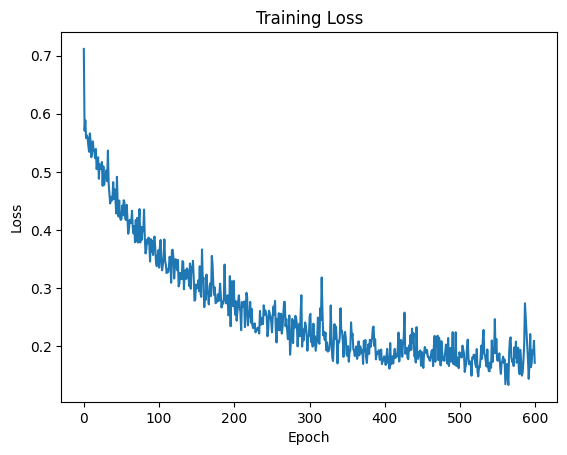

MAE: 14828358.00
MSE: 417379754442752.00
RMSE: 20429874.07


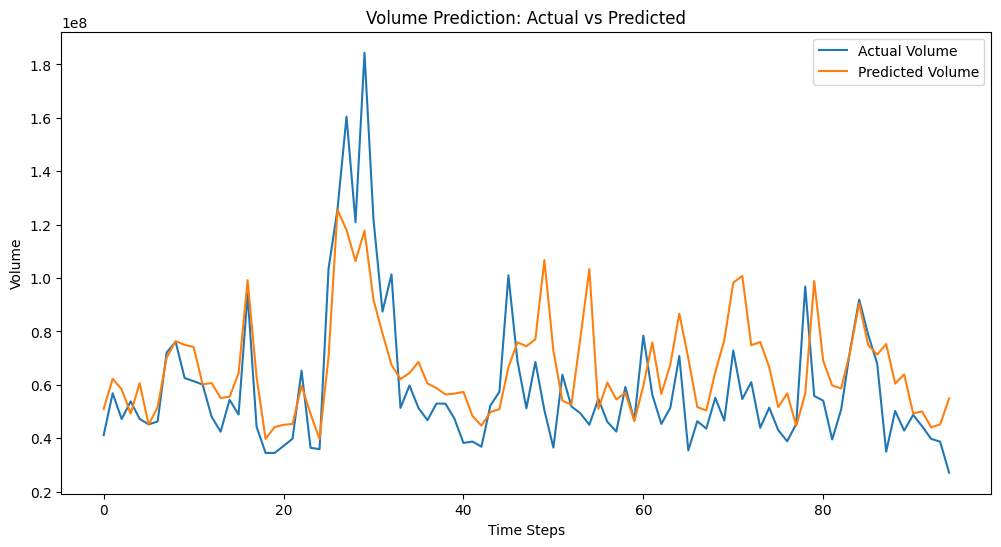

In [562]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Check if GPU is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# 1. Data Preparation
def prepare_data(train_data, test_data):
    # Separate features and target
    X_train = train_data.drop("Volume", axis=1).values
    y_train = train_data["Volume"].values.reshape(-1, 1)
    X_test = test_data.drop("Volume", axis=1).values
    y_test = test_data["Volume"].values.reshape(-1, 1)

    # Scale features
    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    X_test_scaled = scaler_X.transform(X_test)

    # Scale target
    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)
    y_train_tensor = torch.FloatTensor(y_train_scaled).to(device)
    X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
    y_test_tensor = torch.FloatTensor(y_test_scaled).to(device)

    # Create datasets
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

    return train_dataset, test_dataset, scaler_y

# 2. Neural Network Model
class VolumePredictor(nn.Module):
    def __init__(self, input_size):
        super(VolumePredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.2),

            nn.Linear(64, 32),
            nn.ReLU(),

            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

# 3. Training Function
def train_model(model, train_loader, criterion, optimizer, epochs=100):
    model.train()
    losses = []

    for epoch in range(epochs):
        epoch_loss = 0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_loss = epoch_loss / len(train_loader)
        losses.append(avg_loss)

        if (epoch+1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')

    plt.plot(losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

# 4. Evaluation Function
def evaluate_model(model, test_loader, scaler_y):
    model.eval()
    predictions = []
    actuals = []

    with torch.no_grad():
        for inputs, targets in test_loader:
            outputs = model(inputs)
            predictions.extend(outputs.cpu().numpy())
            actuals.extend(targets.cpu().numpy())

    # Inverse transform the scaled data
    predictions = scaler_y.inverse_transform(np.array(predictions).reshape(-1, 1))
    actuals = scaler_y.inverse_transform(np.array(actuals).reshape(-1, 1))

    # Calculate metrics
    mae = mean_absolute_error(actuals, predictions)
    mse = mean_squared_error(actuals, predictions)
    rmse = np.sqrt(mse)

    print(f'MAE: {mae:.2f}')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')

    # Plot first 100 samples for visualization
    plt.figure(figsize=(12, 6))
    plt.plot(actuals[:100], label='Actual Volume')
    plt.plot(predictions[:100], label='Predicted Volume')
    plt.title('Volume Prediction: Actual vs Predicted')
    plt.xlabel('Time Steps')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()

    return predictions, actuals

# Main Execution
if __name__ == "__main__":
    # Assuming train_data and test_data are your DataFrames
    train_dataset, test_dataset, scaler_y = prepare_data(train_data, test_data)

    # Create data loaders
    batch_size = 32
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Initialize model
    input_size = train_data.shape[1] - 1  # Subtract 1 for Volume column
    model = VolumePredictor(input_size).to(device)

    # Loss and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=5, factor=0.5)

    # Train the model
    train_model(model, train_loader, criterion, optimizer, epochs=600)

    # Evaluate the model
    predictions, actuals = evaluate_model(model, test_loader, scaler_y)